In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
directory = "/content/drive/MyDrive/fruits-360/Training"
classes = ["Apple Golden 1", "Avocado", "Cactus fruit", "Carambula", "Cherry 1", "Corn Husk", "Eggplant", "Fig", 
          "Chestnut", "Guava", "Limes", "Corn", "Kaki", "Kiwi", "Lychee", "Dates", "Huckleberry", "Cocos", "Mandarine",
          "Maracuja", "Nectarine Flat", "Nut Pecan", "Pear", "Tomato 1", "Quince", "Pepino", "Redcurrant", "Salak", 
          "Strawberry Wedge", "Raspberry"]

arrays = []

img_size = 100
for i in classes:
    path = os.path.join(directory,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))
      try:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        arrays.append([img_array, class_num])
      except Exception as e:
        continue



In [4]:
directory2 = "/content/drive/MyDrive/fruits-360/Test"
classes2 = ["Apple Golden 1", "Avocado", "Cactus fruit", "Carambula", "Cherry 1", "Corn Husk", "Eggplant", "Fig", 
          "Chestnut", "Guava", "Limes", "Corn", "Kaki", "Kiwi", "Lychee", "Dates", "Huckleberry", "Cocos", "Mandarine",
          "Maracuja", "Nectarine Flat", "Nut Pecan", "Pear", "Tomato 1", "Quince", "Pepino", "Redcurrant", "Salak", 
          "Strawberry Wedge", "Raspberry"]

arrays2 = []
img_size = 100
for i in classes2:
    path = os.path.join(directory2,i)
    class_num2 = classes2.index(i)
    for img in os.listdir(path):
        img_array2 = cv2.imread(os.path.join(path, img))
        try:
          img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
          arrays2.append([img_array, class_num])
        except Exception as e:
          continue


In [5]:
import random
random.shuffle(arrays)
random.shuffle(arrays2)

X_train = []
Y_train = []
for features, label in arrays:
    X_train.append(features)
    Y_train.append(label)
X_train = np.array(X_train)

X_test = []
Y_test = []
for features, label in arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test = np.array(X_test)

In [6]:
del arrays[:]
del arrays2[:]
del classes[:]
del classes2[:]


In [7]:
X_train = X_train.reshape(-1, img_size, img_size, 3)
X_train = X_train / 255

X_test = X_test.reshape(-1, img_size, img_size, 3)
X_test = X_test / 255
print(X_train.shape)
print(X_test.shape)

(15222, 100, 100, 3)
(5114, 100, 100, 3)


In [8]:
Y_train = to_categorical(Y_train, 30)
Y_test = to_categorical(Y_test, 30)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), padding = "same", activation = "relu", input_shape = (100, 100, 3)), 
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [10]:
model.fit(X_train, Y_train, batch_size = 200, epochs = 11) 

Epoch 1/11
77/77 [==============================] - 123s 2s/step - loss: 2.7992 - accuracy: 0.1525
Epoch 2/11
77/77 [==============================] - 114s 1s/step - loss: 1.5529 - accuracy: 0.5197
Epoch 3/11
77/77 [==============================] - 114s 1s/step - loss: 0.7227 - accuracy: 0.8061
Epoch 4/11
77/77 [==============================] - 116s 2s/step - loss: 0.4053 - accuracy: 0.8823
Epoch 5/11
77/77 [==============================] - 114s 1s/step - loss: 0.2349 - accuracy: 0.9187
Epoch 6/11
77/77 [==============================] - 115s 1s/step - loss: 0.1128 - accuracy: 0.9738
Epoch 7/11
77/77 [==============================] - 115s 1s/step - loss: 0.0599 - accuracy: 0.9904
Epoch 8/11
77/77 [==============================] - 114s 1s/step - loss: 0.0400 - accuracy: 0.9940
Epoch 9/11
77/77 [==============================] - 114s 1s/step - loss: 0.0266 - accuracy: 0.9961
Epoch 10/11
77/77 [==============================] - 115s 2s/step - loss: 0.0136 - accuracy: 0.9989
Epoch 11/

In [11]:
model.evaluate(X_test, Y_test)

160/160 [==============================] - 13s 81ms/step - loss: 0.2969 - accuracy: 1.0000


[0.29687947034835815, 1.0]

In [ ]:
# Вывести не получается, так как просто напросто не хватает оперативки...)
fruit_names = ["Apple Golden 1", "Avocado", "Cactus fruit", "Carambula", "Cherry 1", "Corn Husk", "Eggplant", "Fig", 
          "Chestnut", "Guava", "Limes", "Corn", "Kaki", "Kiwi", "Lychee", "Dates", "Huckleberry", "Cocos", "Mandarine",
          "Maracuja", "Nectarine Flat", "Nut Pecan", "Pear", "Tomato 1", "Quince", "Pepino", "Redcurrant", "Salak", 
          "Strawberry Wedge", "Raspberry"]

pred1 = model.predict(X_train)
pred_classes1 = np.argmax(pred1, axis = 1)
true1 = np.argmax(Y_train, axis = 1)
conf_matr1 = confusion_matrix(true1, pred_classes1)
f, ax = plt.subplots(figsize = (31, 30))
sns.heatmap(conf_matr1, annot = True, fmt = ".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
f.clear()
ax.clear()
plt.close(f)

160/160 [==============================] - 46s 289ms/step


ValueError: ignored

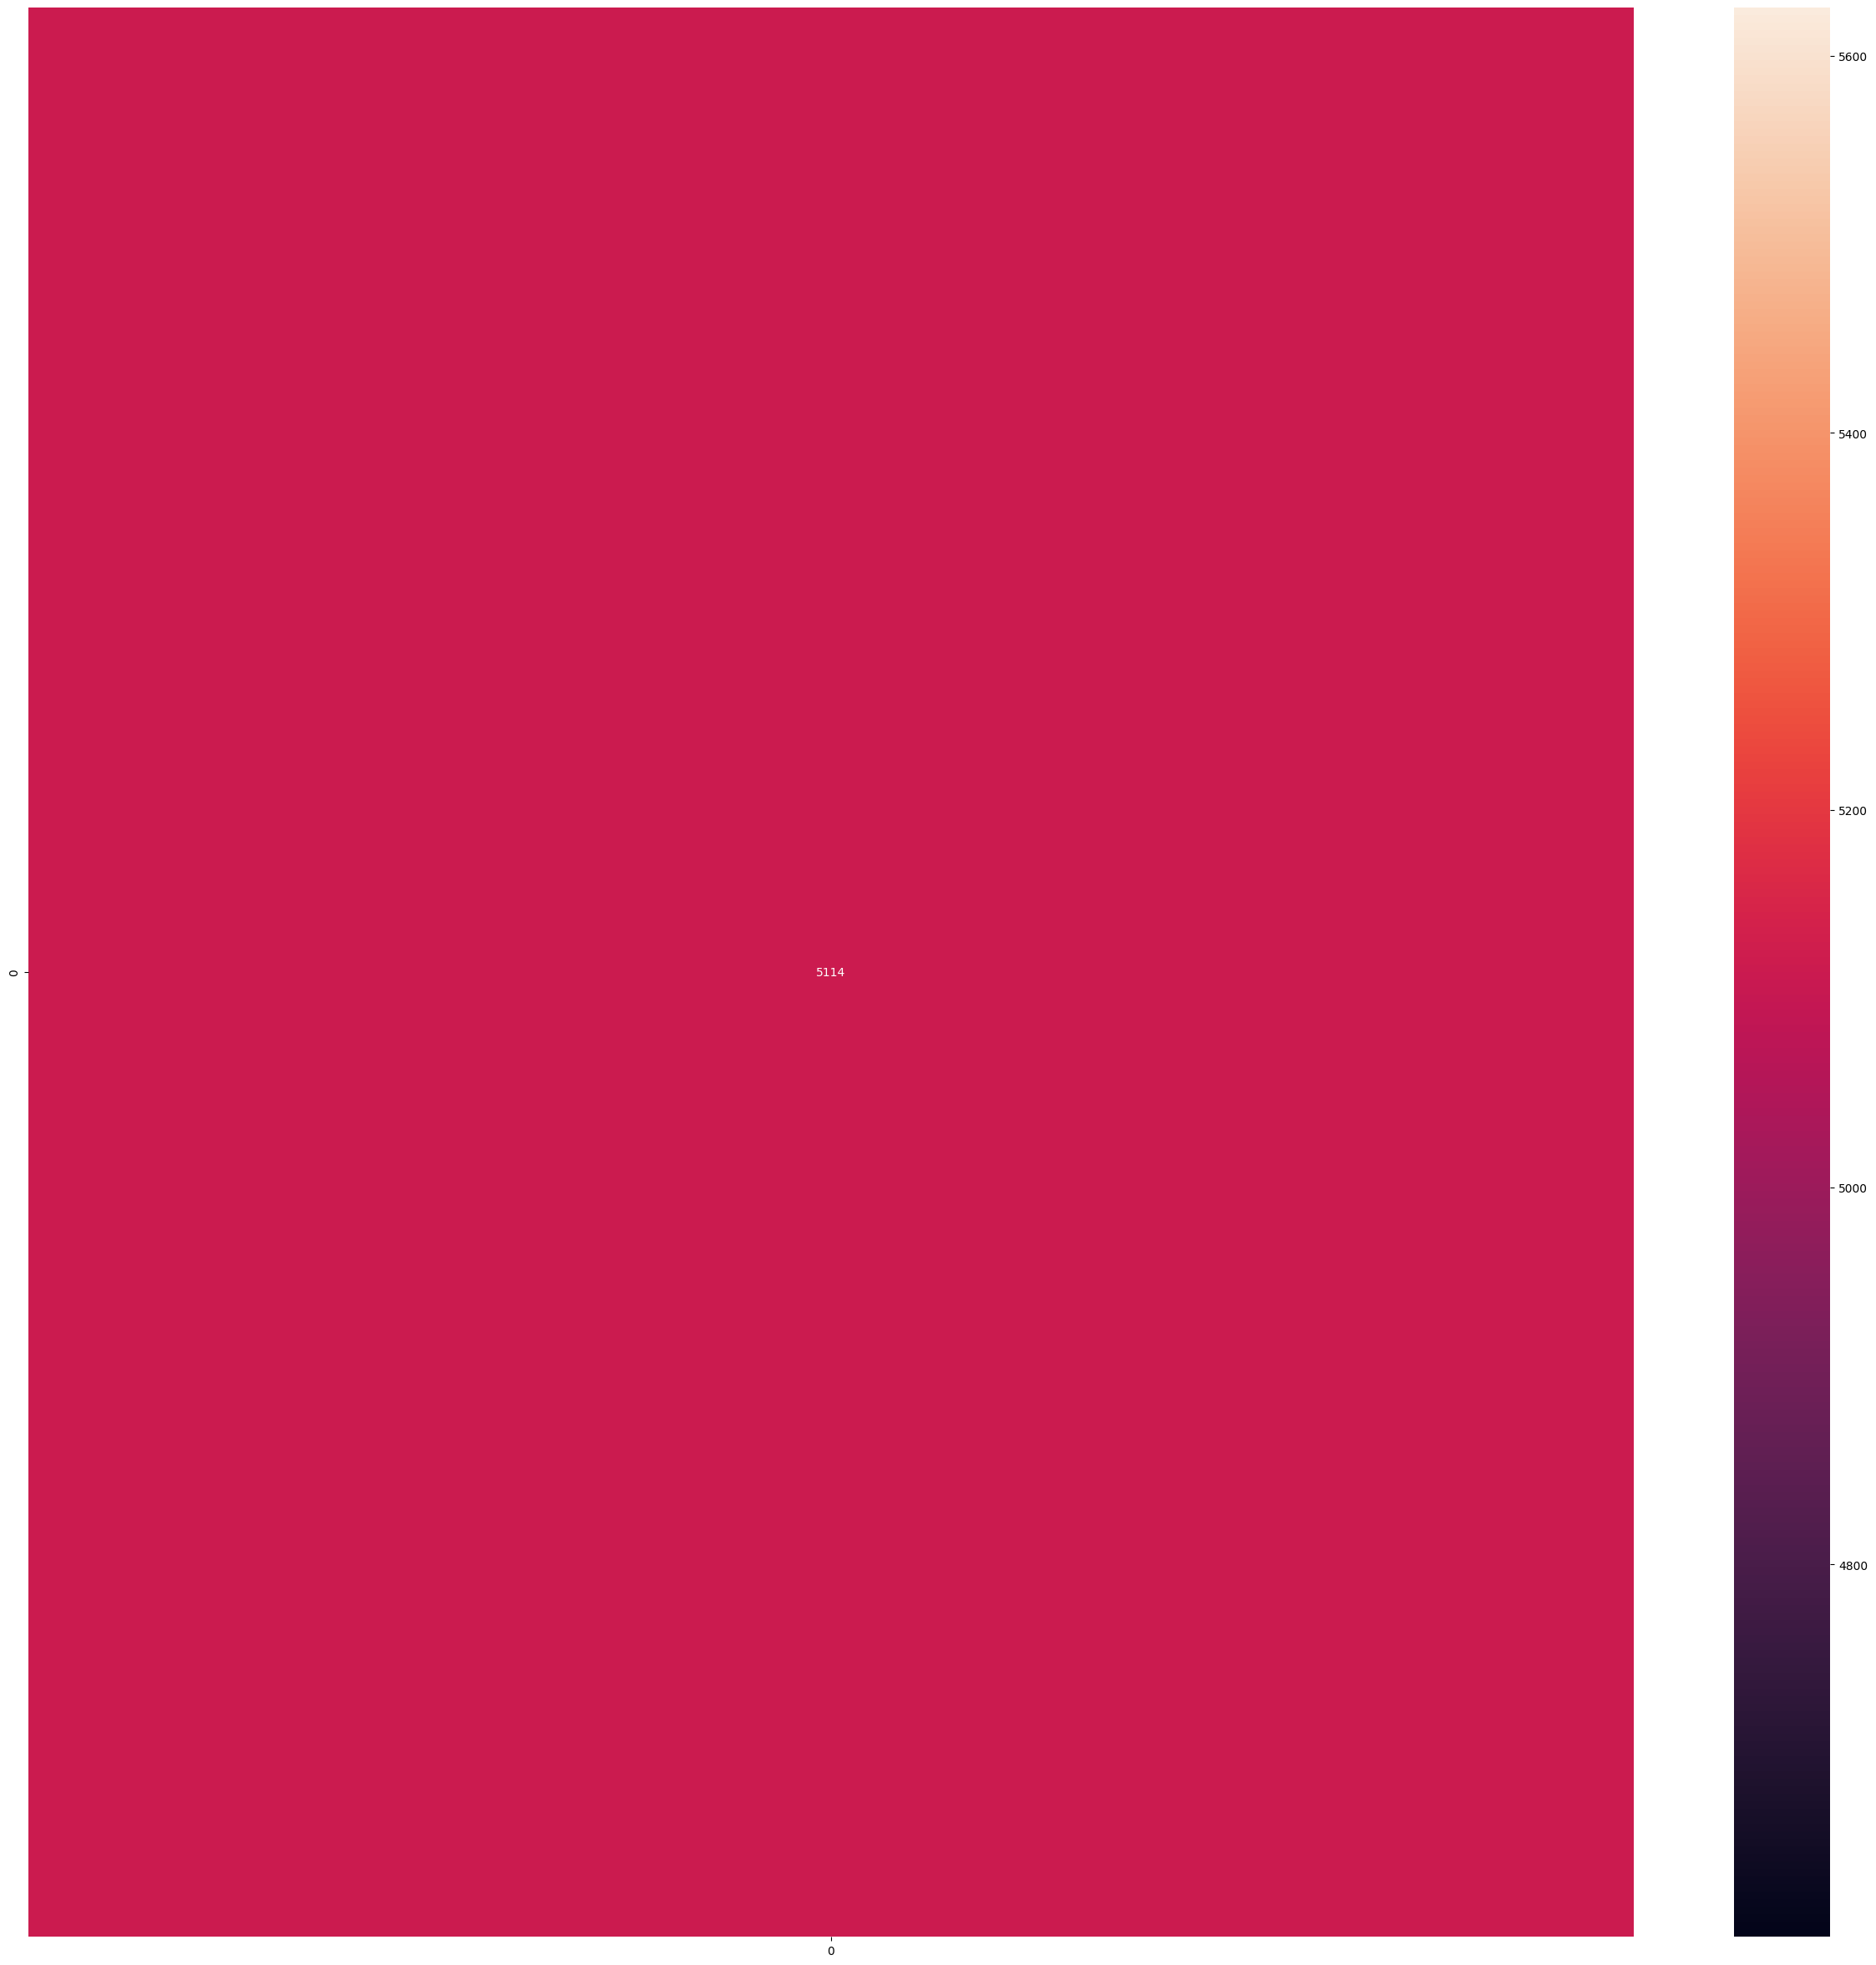

In [ ]:
fruit_names1 = ["Apple Golden 1", "Avocado", "Cactus fruit", "Carambula", "Cherry 1", "Corn Husk", "Eggplant", "Fig", 
          "Chestnut", "Guava", "Limes", "Corn", "Kaki", "Kiwi", "Lychee", "Dates", "Huckleberry", "Cocos", "Mandarine",
          "Maracuja", "Nectarine Flat", "Nut Pecan", "Pear", "Tomato 1", "Quince", "Pepino", "Redcurrant", "Salak", 
          "Strawberry Wedge", "Raspberry"]

pred_test = model.predict(X_test)
pred_classes_test = np.argmax(pred_test, axis = 1)
true_test = np.argmax(Y_test, axis = 1)
conf_matr_test = confusion_matrix(true_test, pred_classes_test)
f, ax = plt.subplots(figsize = (31, 30))
sns.heatmap(conf_matr_test, annot = True, fmt = ".0f")
ax.set_xticklabels(fruit_names1)
ax.set_yticklabels(fruit_names1)
plt.show()